# Data Mining Assignment 3

by Tyler Jackson

    For this assignment we will look at four different tasks.  The first two are taken from assignment 2, and we will add three more as well.  We will use several different modeling techniques including K-Nearest Neighbor, Random Forests, ADA Boost with Decision Trees, nearest Centroid, and Gaussian Naive-Bayes to try and classify our system.  The four tasks I will be examining for this assignment are whether or not someone is married, and whether or not someone has a college degree from assignment 2 as well as whether or not they are employed, and whether or not they make more than 50k a year.  For this modeling we are using the Adult data set from the UCI Website, which is the same data set I used for Assignment 1 and 2.  Most of the data manipulation and description is taken from these assignments.
    
    Ways I tried to go above and beyone include using Randomized Principal Component Analysis to reduce the dimensions of my feature set.  I also used 5 different modeling techniques.  When fine tuning the parameters I used grid search which uses 3-fold cross validation.  I split up my dataset into training and test with a 10 fold cross validation.  The reason I chose 10 was because my dataset was farely large, so I knew that if I had around 30,000 records, I would still be testing against approximately 3000 records of data for each split.  I didn't want to divide the data anymore because I wanted the data I tested against to still be farely large.  I also didn't want to use too few, because I wanted to get a good average of how well my models were working, so 10 seemed reasonable.  
    
    Some troubles I ran into were the computational cost of using grid search in tandem with a 10-fold cross-validated split.  Both K Nearest Neighbor, Random Forests, and ADA Boost ran extremely slow.  As a result, for my sanity I only used Grid Search with the first task.  Grid Search was really cool here though because of how many different scenarios I was able to test with one command.  For example, with the Random Forest classification I fine tuned four different parameters.  Three of these parameters I passed 3 options, and the fourth I provided 2 options.  This means that it tests 3*3*3*2 scenarios for three different splits of data (3 way cross validation).  That is 54 scenarios.  Then you take into account the fact that it was doing it over a 10 fold cross validation and we are looking at 540 cases!   

    I also ran into a little trouble trying to do multiclass classifications.  I really wanted to be able to classify what someone's Occupation was, and what their work ethic was.  Both of these are nominal attributes, so I needed to change their values to their one-hot encoded equivalent.  I tried for a while playing around with sklearn's preprocessing OneHotEncoder object, but couldn't get it to work well with the Classifiers after it Transformed my data.  So I ended up just sticking to binary classifications in which I normalized all the data.
    
    The visualizations I use include a histogram of each task to help determine which metrics would be preferable for which class, an ROC curve (made easy by using binary classes to start) to show the relationship between true positive and false positives, as well as the oob score for random forests.  Remember the oob score is used with a random forest and shows how well the model is generalizing on the data you aren't currently training.  You want this to be as close to possible to your accuracy from your classification.  If it is not, an underestimate would be preferable.  When looking at the histogram I used Eric Larson's rule regarding evaluation metrics on a class.
- (1) those that occur frequently (prefer low false positives or high precision)
- (2) those that occur less frequently (prefer low false negatives or high recall)
- (3) the entire dataset (prefer high accuracy)


    There are 14 different attributes in the data set with 1 binomial label.  The first attribute is Age which refers to the age of the person and ranges from 17 to 90 years.  Age is a continuous ratio data type because you can add ages, multiply ages, they are distinct, and their order matters.  

    The second attribute is Work_Class which refers to the type of work the record does.  The various values of the Work_Class attribute are Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, and Never-worked.  This attribute's data type is discrete and nominal, because these values are categories in which the order does not matter.  Self-emp-not-inc refers to the self employed person who has not incorporated, and Self-emp-inc is someone who is self-employed and incorporated.  Without pay is someone who works without pay, and Never-Worked refers to someone who has never worked.  We will group Self-emp-not-inc, and Self-emp-inc into one category called Self-Employed.  We will group the Federal-gov, State-gov, and Local-gov into a category called Government-Worker.  The Without-pay and Never-worked categories will be grouped into a Not-Paid category.  Classifying whether or not someone is employed will be our third task.    
    
    The third attribute is Final_Weight.  Final_Weight is an attribute that is provided by the US Census Bureau and refers to how much of the population the individual record represents.  It is used to account for sampling error.  For example, if the sample was not indicative of the population the data wouldn't be very useful.  The Final_Weight is designed to counteract errors that result from either sampling one demographic too often, or from another demographic not returning the survey quite as often.  For example, if the survey was only passed out online, then it would be biased towards people who could afford a computer, and those with lower income would be underrepresented.  The Final_Weight is a continuous ratio because the values can be multiplied and added to each other, their order matters, and they are distinct.  
    
    Educ is the next attribute and refers to the completed education level of the record.  Educ is ordinal and discrete, because the order does matter, and it is categorical.  The possible values for Educ are Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, and Preschool.  In order to  simplify the dataset into more understandable groups we will group Educ into 'Didnt_Finish_HS','HS_Grad','College_Degree', 'Masters', and 'Doctorate' for the first task trying to predict whether or not someone is married.  This will group everyone with some college but no degree into HS_Grad as that would be their highest completed education.  For our second task we will group these categories into whether or not someone has a college degree.  This will be a binomial variable called Has_College_Degree with 1 being a yes and 0 being a no.  
    
    Educ_Num is the numerical representation of Educ.  The UCI Machine Learning Repository says it is a continuous datatype, but I disagree.  It is ordinal and discrete with integer values ranging from 1 to 16.  The order matters, because a higher value implies there is more education.  It is not continuous, because an Educ_Num value twice as high as another doesn't directly correlate to twice as much education.  Also, there are no fractional values which a continuous variable implies there could be.  We will discard this attribute, because the Educ attribute provides enough detail for the scope of our analysis.  
    
    Marital_Status is a nominal discrete attribute with values such as Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, and Married-AF-spouse.  These values are categorical, and order does not matter.  For the first task we will group all of the categories that are married into 1 and the ones that aren't into another.  This column will be called Is_Married with a 1 being a yes and a no being a 0.  For the rest of the tasks we will group them a little differently.  The three marriage options are married with a civilian as your spouse, married with your spouse absent, and married with your spouse in the Armed Forces, but we will group all three of these into a Married category.  We will also group Divorced and Separated together into a Divorced category.
    
    Occupation refers to the type of job the record held.  It is also nominal and discrete as the order doesn't matter and the options are categories.  The possible values are Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, and Armed-Forces.  Machine-op-inspct refers to a machine operator or inspector.  We will group these categories into Upper-Management(Exec-managerial), Manual-Labor(Machine-op-inspct,Transport-moving,Farming-fishing), Military(Protective-serv, Armed Forces),Specialty-Services(Prof-specialty,Tech-support,Craft-repair),Sales, and Other-service(Handlers-cleaners,Other-service,Adm-clerical,Priv-house-serv).
    
    The Relationship attribute is categorical and nominal and refers to more familial relationships.  The obscure aspect of this attribute is that there is only one relationship per record.  My guess is that the survey asked for the defining relationship, or the most significant relationship.  The possible values for this attribute are Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried. This attribute will also be removed as it is not very useful.
    
    The Race attribute is nominal and discrete, and its possible values are White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  There is no order and these are categorical values.
    
    The Sex attribute is binomial and will be changed to 'Is_Male', with Male values corresponding to 1 and Female values corresponding to 0.  It is nominal and discrete as there are two categories in which order does not matter.
    
    Cap_Gain and Cap_Loss are two continuous ratio data types.  They refer to the money one made and loss on selling captial assets meaning investments in stock, bonds, etc.  If someone sold their asset for more than they purchased it then the difference is a Capital Gain.  Cap_Gain values range from $0 to $99,999 and Cap_Loss ranges from $0 to $4356.  Both of these attributes are going to be removed because only 2700 records have Cap_Gain values greater than $0 and only 1500 records have Cap_Loss values greater than $0.
    
    The Hrs_Per_Week attribute is a continuous ratio data type.  The values are distinct, order matters, they can be added to each other and multiplied.  The values range from 1 hour to 99 hours per week.

    Nat_Country refers to the person's native country, and is nominal and discrete.  The values are categorical, and order does not matter.  The possible values for this category are United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, and Holand-Netherlands.  This column will be changed to is_US_Native, with a 1 corresponding to the records where Nat_Country is the United-States, and 0 when it is not.  I thought about maybe grouping it by continent, but thought that might be misleading as the financial situations of countries can vary so greatly within a continent.  I also thought it would be a cool attribute to be able to compare against whether or not the person was originally from the U.S.
    
    The last column refers to the binomial label Is_Grtr_50 which is what the original data analysis was trying to be modeled to predict.  This column will be changed to have 1 correspond to >50K and 0 corresponding to <=50K.  This will be used for our fourth task.
    
    We will also add Age_Range.  This will group people below the age of 30 as Early_Adulthood.  People between the ages of 30 and 60 will be grouped as Adult, and over the age of 60 will be grouped as Senior.
    
    We will add a Work_Ethic attribute for task 5 that refers to how many hours someone works.  We will group people who work < 40 hours into a Lazy_Worker group, people who work 40-50 hours into a Good_Worker class, and people who work more than 50 hours a week into a Hard_Worker class.  
    
    The data also has missing values, so we will replace the missing values with the mean for the continuous data.  The rows with missing values in the categorical data will be removed.  Originally, I had planned on replacing them with the mode as the mode is already the most occurring value.  I decided not to because I didn't want the mode to become inflated by speculating the likelihood of those missing values being consistent with the rest of the data.  
    

In [181]:
import pandas as pd
import numpy as np
import mpld3
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#load in the data to the data frame
df = pd.read_csv("./dataset_Census_Income/adult.data")

#This will give you some more general information about the columns and then 
#show the first 5 rows so that the original data can be seen before being modified.
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Work_Class        32561 non-null object
Final_Weight      32561 non-null int64
Educ              32561 non-null object
Educ_Num          32561 non-null int64
Marital_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Cap_Gain          32561 non-null int64
Cap_Loss          32561 non-null int64
Hrs_Per_Week      32561 non-null int64
Nat_Country       32561 non-null object
Is_Grtr_50        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None


,Age,Work_Class,Final_Weight,Educ,Educ_Num,Marital_Status,Occupation,Relationship,Race,Sex,Cap_Gain,Cap_Loss,Hrs_Per_Week,Nat_Country,Is_Grtr_50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In order to make this data easier to work with we will perform dimensionality reduction on some of the categories with too
many options.  We will also convert the data into its one-hot encoding form if it is categorical.  Many of these columns that
only have 2 unique options will also be converted into 0 and 1 based on the value.  The goal of this data refining is to put
all of the data into a numerical representation that we can use for our model.  

In [182]:
#Most of this was copied from Assignment 1

#This is just the preprocessing I did that applies to all of the tasks.

#delete the columns we aren't using and change names to be clearer
del df['Educ_Num']
del df['Relationship']
del df['Cap_Gain']
del df['Cap_Loss']

#as mentioned above rename Sex to Is_Male
df['Is_Male'] = df['Sex']
del df['Sex']

#rename Nat_Country to Is_US_Native
df['Is_US_Native'] = df['Nat_Country']
del df['Nat_Country']

#replace any missing data values with numpy's Not a Number
import numpy as np
df = df.replace(to_replace= '?', value =np.nan)

#Dimensionality Reduction

#group the work class attribute into fewer categories as mentioned above.
df = df.replace(to_replace=['Self-emp-inc','Self-emp-not-inc'],value=['Self-Employed','Self-Employed'])
df = df.replace(to_replace=['Federal-gov','Local-gov','State-gov'],value=['Government-Worker','Government-Worker','Government-Worker'])
df = df.replace(to_replace=['Without-pay','Never-worked'],value=['Not-Paid','Not-Paid'])

#group the occupation options into their categories mentioned above
df = df.replace(to_replace=['Exec-managerial'], value=['Upper-Management'])
df = df.replace(to_replace=['Machine-op-inspct','Transport-moving','Farming-fishing'],value=['Manual-Labor','Manual-Labor','Manual-Labor'])
df = df.replace(to_replace=['Protective-serv','Armed-Forces'],value=['Military','Military'])
df = df.replace(to_replace=['Prof-specialty','Tech-support','Craft-repair'],value=['Specialty-Service','Specialty-Service','Specialty-Service'])
df = df.replace(to_replace=['Handlers-cleaners','Other-service','Adm-clerical','Priv-house-serv'],value=['Other-service','Other-service','Other-service','Other-service'])

#group the marital_status options into their categories mentioned above
df = df.replace(to_replace=['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent','Separated'],value=['Married','Married','Married','Married'])

#group the various educational groups into the categories mentioned above
df = df.replace(to_replace=['Bachelors','Prof-school','Assoc-acdm','Assoc-voc'],value=['College_Degree','College_Degree','College_Degree','College_Degree'])
df = df.replace(to_replace='Some-college',value='HS-grad')
df = df.replace(to_replace=['11th','9th','7th-8th','12th','1st-4th','10th','5th-6th','Preschool'],value=['No_HS_Diploma','No_HS_Diploma','No_HS_Diploma','No_HS_Diploma','No_HS_Diploma','No_HS_Diploma','No_HS_Diploma','No_HS_Diploma'])

#change Nat_Country to is US or isn't US native
bad_countries = ['Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong','Holand-Netherlands']
df = df.replace(to_replace=bad_countries,value=['Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US','Not-US'])

#clean up the columns to be 0 and 1 for the binomial data
df = df.replace(to_replace=['>50K','<=50K'], value=[1,0])
df = df.replace(to_replace=['Male','Female'], value=[1,0])
df = df.replace(to_replace=['United-States','Not-US'],value=[1,0])

#Add these features
#I added this feature for the age range so that I could group by their age as another form of analysis.
df['Age_Range'] = pd.cut(df.Age,[0,30,60,1e6],3,labels=['Early Adulthood','Adult','Senior'])

#I added this feature for the age range so that I could group by their age as another form of analysis.
df['Work_Ethic'] = pd.cut(df.Hrs_Per_Week,[0,40,50,1e6],3,labels=['Lazy_Worker','Good_Worker','Hard_Worker'])

#drop all rows with a missing value
df = df.dropna()

#Now we want to convert df into the data we need for our four tasks

#Convert all categorical data to 1 hot encoding equivalent if more than 2 unique values and if 2 change to numbers
#instead of categorical 1s and 0s





In [183]:
#FOR TASK 1 -- Is Married ---------------------------------------------------------------------------------------------
#for the first task we are predicting marital status
#    Up to this point we haven't touched the categorical feature Marital Status.
#    We want Marital Status to be a 2 option field with is married or is not married as the two options
df_task1 = df.replace(to_replace=['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent','Separated'],value=['Married','Married','Married','Married'])
df_task1 = df_task1.replace(to_replace=['Divorced','Widowed','Never-married'],value=['Not-Married','Not-Married','Not-Married'])
df_task1 = df_task1.replace(to_replace=['Married','Not-Married'],value=[1,0])
#rename Marital_Status to Is_Married
df_task1['Is_Married'] = df_task1['Marital_Status']
del df_task1['Marital_Status']
df_task1 = df_task1.replace(to_replace=['Married','Not-Married'], value=[1,0])

tmp_df = pd.get_dummies(df_task1.Work_Class,prefix='Work_Class')
df_task1 = pd.concat((df_task1,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task1.Educ,prefix='Educ')
df_task1 = pd.concat((df_task1,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task1.Occupation,prefix='Occupation')
df_task1 = pd.concat((df_task1,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task1.Race,prefix='Race')
df_task1 = pd.concat((df_task1,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task1.Age_Range,prefix='Age_Range')
df_task1 = pd.concat((df_task1,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task1.Work_Ethic,prefix='Work_Ethic')
df_task1 = pd.concat((df_task1,tmp_df),axis=1)

#make sure all of non categorical data is numerical
df_task1.Is_US_Native = df_task1.Is_US_Native.astype(np.int)
df_task1.Is_Male = df_task1.Is_Male.astype(np.int)
df_task1.Is_Grtr_50 = df_task1.Is_Grtr_50.astype(np.int)
df_task1.Is_Married = df_task1.Is_Married.astype(np.int)

#delete original columns
del df_task1['Work_Class']
del df_task1['Educ']
del df_task1['Occupation']
del df_task1['Race']
del df_task1['Age_Range']
del df_task1['Work_Ethic']
del df_task1['Final_Weight']
#End of preprocessing task 1-------------------------------------------------------------------------------------------


In [184]:
#FOR TASK 2 -- Has College Degree--------------------------------------------------------------------------------------
#for the second task we are predicting college degree
#    Up to this point we have grouped the education based on a few different categories.  For the second
#    task we want the education to be either a college degree or not a college degree. 

df_task2 = df.replace(to_replace=['HS-grad','No_HS_Diploma'],value=['No_College_Degree','No_College_Degree'])
df_task2 = df_task2.replace(to_replace=['Masters','Doctorate'],value=['College_Degree','College_Degree'])
#rename Educ to Has_College_Degree
df_task2['Has_College_Degree'] = df_task2['Educ']
del df_task2['Educ']
df_task2 = df_task2.replace(to_replace=['College_Degree','No_College_Degree'], value=[1,0])

tmp_df = pd.get_dummies(df_task2.Work_Class,prefix='Work_Class')
df_task2 = pd.concat((df_task2,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task2.Occupation,prefix='Occupation')
df_task2 = pd.concat((df_task2,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task2.Race,prefix='Race')
df_task2 = pd.concat((df_task2,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task2.Age_Range,prefix='Age_Range')
df_task2 = pd.concat((df_task2,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task2.Marital_Status,prefix='Marital_Status')
df_task2 = pd.concat((df_task2,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task2.Work_Ethic,prefix='Work_Ethic')
df_task2 = pd.concat((df_task2,tmp_df),axis=1)

#make sure all non categorical data is numerical for task 2
df_task2.Is_US_Native = df_task2.Is_US_Native.astype(np.int)
df_task2.Is_Male = df_task2.Is_Male.astype(np.int)
df_task2.Is_Grtr_50 = df_task2.Is_Grtr_50.astype(np.int)
df_task2.Has_College_Degree = df_task2.Has_College_Degree.astype(np.int)

#delete extra columns for task 2
del df_task2['Work_Class']
del df_task2['Marital_Status']
del df_task2['Occupation']
del df_task2['Race']
del df_task2['Age_Range']
del df_task2['Final_Weight']
del df_task2['Work_Ethic']
#End of preprocesssing Task 2------------------------------------------------------------------------------------------


In [185]:
#FOR TASK 3 -- Unemployed--------------------------------------------------------------------------------------------------

df_task3 = df.copy()

df_task3['Is_Employed'] = df_task3['Work_Class']
del df_task3['Work_Class']
df_task3 = df_task3.replace(to_replace=['Private','Self-Employed','Government-Worker','Not-Paid'], value=[1,1,1,0])

tmp_df = pd.get_dummies(df_task3.Educ,prefix='Educ')
df_task3 = pd.concat((df_task3,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task3.Race,prefix='Race')
df_task3 = pd.concat((df_task3,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task3.Occupation,prefix='Occupation')
df_task3 = pd.concat((df_task3,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task3.Age_Range,prefix='Age_Range')
df_task3 = pd.concat((df_task3,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task3.Marital_Status,prefix='Marital_Status')
df_task3 = pd.concat((df_task3,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task3.Work_Ethic,prefix='Work_Ethic')
df_task3 = pd.concat((df_task3,tmp_df),axis=1)

#make sure all of non categorical data is numerical
df_task3.Is_US_Native = df_task3.Is_US_Native.astype(np.int)
df_task3.Is_Male = df_task3.Is_Male.astype(np.int)
df_task3.Is_Grtr_50 = df_task3.Is_Grtr_50.astype(np.int)
df_task3.Is_Employed = df_task3.Is_Employed.astype(np.int)

#delete original columns
del df_task3['Educ']
del df_task3['Race']
del df_task3['Age_Range']
del df_task3['Final_Weight']
del df_task3['Marital_Status']
del df_task3['Work_Ethic']
del df_task3['Occupation']

#End of Preprocessing for Task 3---------------------------------------------------------------------------------------

In [186]:
#For Task 4 -- > 50k per year------------------------------------------------------------------------------------------

df_task4 = df.copy()
tmp_df = pd.get_dummies(df_task4.Work_Class,prefix='Work_Class')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task4.Age_Range,prefix='Age_Range')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task4.Occupation,prefix='Occupation')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task4.Educ,prefix='Educ')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task4.Race,prefix='Race')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task4.Marital_Status,prefix='Marital_Status')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_task4.Work_Ethic,prefix='Work_Ethic')
df_task4 = pd.concat((df_task4,tmp_df),axis=1)

#make sure all of non categorical data is numerical
df_task4.Is_US_Native = df_task4.Is_US_Native.astype(np.int)
df_task4.Is_Male = df_task4.Is_Male.astype(np.int)
df_task4.Is_Grtr_50 = df_task4.Is_Grtr_50.astype(np.int)

#delete original columns
del df_task4['Work_Class']
del df_task4['Educ']
del df_task4['Race']
del df_task4['Age_Range']
del df_task4['Final_Weight']
del df_task4['Marital_Status']
del df_task4['Work_Ethic']
del df_task4['Occupation']

#End of preprocessing Task 4-------------------------------------------------------------------------------------------

In [187]:
#print out the info for each newly formed data frame

print 'Attributes for Task 1'
print
df_task1.info()
print
print 'Attributes for Task 2'
print
df_task2.info()

print
print 'Attributes for Task 3'
print
df_task3.info()

print
print 'Attributes for Task 4'
print
df_task4.info()


Attributes for Task 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 32 columns):
Age                             30162 non-null int64
Hrs_Per_Week                    30162 non-null int64
Is_Grtr_50                      30162 non-null int64
Is_Male                         30162 non-null int64
Is_US_Native                    30162 non-null int64
Is_Married                      30162 non-null int64
Work_Class_Government-Worker    30162 non-null float64
Work_Class_Not-Paid             30162 non-null float64
Work_Class_Private              30162 non-null float64
Work_Class_Self-Employed        30162 non-null float64
Educ_College_Degree             30162 non-null float64
Educ_Doctorate                  30162 non-null float64
Educ_HS-grad                    30162 non-null float64
Educ_Masters                    30162 non-null float64
Educ_No_HS_Diploma              30162 non-null float64
Occupation_Manual-Labor         30162 non-null float64


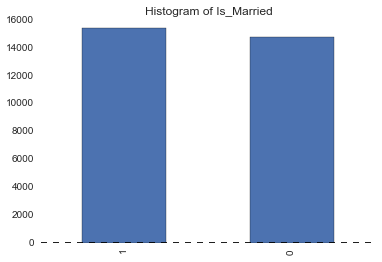

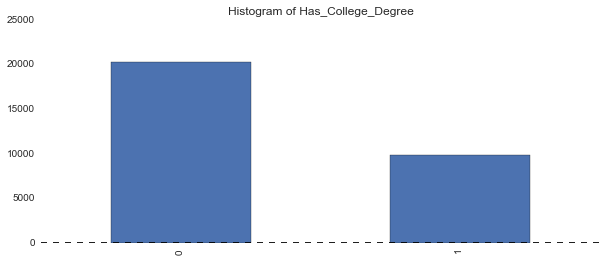

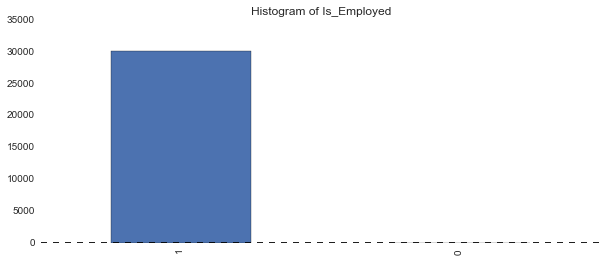

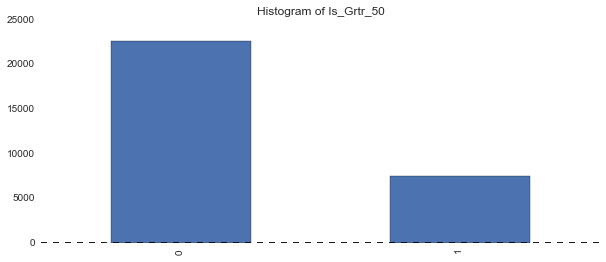

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

ax = df_task1['Is_Married'].value_counts().plot(kind='bar',title='Histogram of Is_Married')
plt.figure(figsize=(10,4))
df_task2['Has_College_Degree'].value_counts().plot(kind='bar',title='Histogram of Has_College_Degree')
plt.figure(figsize=(10,4))
ax = df_task3['Is_Employed'].value_counts().plot(kind='bar',title='Histogram of Is_Employed')
plt.figure(figsize=(10,4))
ax = df_task4['Is_Grtr_50'].value_counts().plot(kind='bar',title='Histogram of Is_Grtr_50')



Remember with the classes that occur frequently we will want a high precision, and the classes that occur infrequently we want a high recall.  So for histogram of Is Employed we can see a high precision is important, and for is Grtr 50 a high recall would be important.  Of course accuracy will be important with all of them.

### Task1 -- Is Married Classifier

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold

# create variables we are more familiar with
y = df_task1.Is_Married.values
del df_task1["Is_Married"]
X = df_task1.values

scl_obj = StandardScaler()
scl_obj.fit(X) # find points that make this zero mean and unit std
X = scl_obj.transform(X) # apply to data

yhat = np.zeros(y.shape) # we will fill this with predictions
best_n = np.zeros(y.shape)
# create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)


##K-Nearest Neighbor

In [110]:
from sklearn.decomposition import RandomizedPCA 
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',KNeighborsClassifier())]
)
param_grid = {"PCA_TJ_$$__n_components" : [10,20,40],"CLF_TJ_$$__n_neighbors" : [15,35,75]}

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')
                  
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN, pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=40, random_state=None,
       whiten=False)), ('CLF_TJ_$$', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='uniform'))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=40, random_state=None,
       whiten=False)), ('CLF_TJ_$$', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='uniform'))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=40, random_state=None,
       whiten=False)), ('CLF_TJ_$$', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='uniform'))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=40, random_state=None,
       white

In [113]:
#Now run ideal kNN parameter combo from all folds -- I used majority rule to determine which to use when comparing
#over the folds -> For the nearest neighbor, both 15 and 35 were chosen ideal half the time so I took an average of
#the 2 (25)
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=40)),
     ('CLF_TJ_$$',KNeighborsClassifier(n_neighbors=25))]
)
for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN, Refined accuracy', total_accuracy

KNN, Refined accuracy 0.759399244082


##Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

# setup pipeline to take PCA, then fit a RandomForest classifier
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',RandomForestClassifier(n_jobs=-1))]
)
param_grid = {"PCA_TJ_$$__n_components" : [55,101,155],"CLF_TJ_$$__max_depth" : [5,10,15],"CLF_TJ_$$__n_estimators":[80,100,120],"CLF_TJ_$$__oob_score":[True,False]}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n

total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, pipeline accuracy', total_accuracy


Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=155,
       random_state=None, whiten=False)), ('CLF_TJ_$$', RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=55, random_state=None,
       whiten=False)), ('CLF_TJ_$$', RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iter

In [123]:
#Try best combination of parameters from grid search results
clf = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=True)


print clf
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, Refined pipeline accuracy', total_accuracy

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=120, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0)
Random Forest, Refined pipeline accuracy 0.780385916053


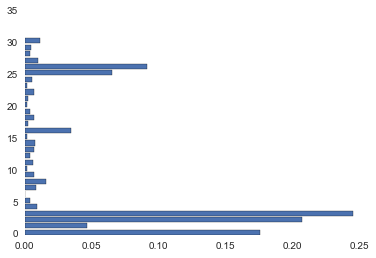

Generalization score estimate from training data 0.781338637787


In [124]:
# now lets get access to the different properties of our RF

plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

print 'Generalization score estimate from training data', clf.oob_score_

It looks like the most important features are the first four, the 17th, 26th, and 27th.  These include Age, Is_Male, Is_Grtr_50, Hrs_Per_Week, Occupation_Military, Race_White, and Age_Range_Adult.  This implies that these values tell us a lot about whether or not someone is married.  Some of these seem obvious, like being an Adult would make you more likely to be married.  It is interesting that whether or not you are in the military has a strong impact on your marital status, and also that being white in particular changes your probability.  The oob score is very close to my accuracy from the model, so we can say that it generalizes well.    

##Ada Boost (Decision Tree)

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf_pipe = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA()),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump))]
)
param_grid = {"PCA_TJ_$$__n_components" : [5,15,50],"CLF_TJ_$$__n_estimators":[20,40,80]}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n
  
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=15, random_state=None,
       whiten=False)), ('CLF_TJ_$$', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=10, max_f...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=20, random_state=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=50, random_state=None,
       whiten=False)), ('CLF_TJ_$$', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=10, max_f...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=20, random_state=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=15, random_state=None,
       whiten=False)), ('CLF_TJ_$$', AdaBoostClassifier(algorit

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import RandomizedPCA 
from sklearn import metrics as mt

#Try best combination of parameters from grid search results
dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf_pipe = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA(n_components=50)),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump, n_estimators=40))]
)

for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'ADA Boost Classifier, Refined pipeline accuracy', total_accuracy

ADA Boost Classifier, Refined pipeline accuracy 0.714906173331


##Nearest Centroid

In [103]:
from sklearn.neighbors import NearestCentroid

clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',NearestCentroid())]
)
param_grid = {"PCA_TJ_$$__n_components" : [5,25,75],"CLF_TJ_$$__metric":['cosine','euclidean']}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='cosine', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='cosine', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='cosine', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='cosine', shr

In [44]:
#Try best combination of parameters from grid search results
from sklearn.neighbors import NearestCentroid

clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
     ('CLF_TJ_$$',NearestCentroid(metric='cosine'))]
)

for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Nearest Centroid Classifier, Refined pipeline accuracy', total_accuracy

Nearest Centroid Classifier, Refined pipeline accuracy 0.705092500497


##Gaussian Naive-Bayes

In [106]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',GaussianNB())]
)

param_grid = {"PCA_TJ_$$__n_components" : [5,50,100]}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n

total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=50, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=50, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=50, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=50, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=50, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$',

In [47]:
#Try best combination of parameters from grid search results
from sklearn.naive_bayes import GaussianNB
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=50)),
     ('CLF_TJ_$$',GaussianNB())]
)

for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Gaussian Naive-Bayes Classifier, Refined pipeline accuracy', total_accuracy

Gaussian Naive-Bayes Classifier, Refined pipeline accuracy 0.711126583118


K-Nearest Neighbor and Random Forests had the two best accuracies, so we will examine statistics regarding these two.  The distribution between the two classes of Is_Married is relatively even so from the histogram we wouldn't determine that recall or precision is more important than the other.  Since we will weight them evenly we can use the F-score.  

In [102]:
from sklearn import metrics as mt
# get various measures of performance

#Calculate the accuracy for the k-nearest neighbors classifier
clf1 = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=40)),
     ('CLF_TJ_$$',KNeighborsClassifier(n_neighbors=25))]
)
for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)
        
print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Total Precision: 0.645221736415
Total Recall: 0.550346297283
Total F score: 0.594019551466
Total Accuracy: 0.812744512963


In [106]:
clf2 = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=True)


print clf2
for train, test in cv:
    clf2.fit(X[train],y[train])
    yhat[test] = clf2.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=120, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0)
Total Precision: 0.699191685912
Total Recall: 0.483883857219
Total F score: 0.571945843829
Total Accuracy: 0.819706915987


##Roc Curves

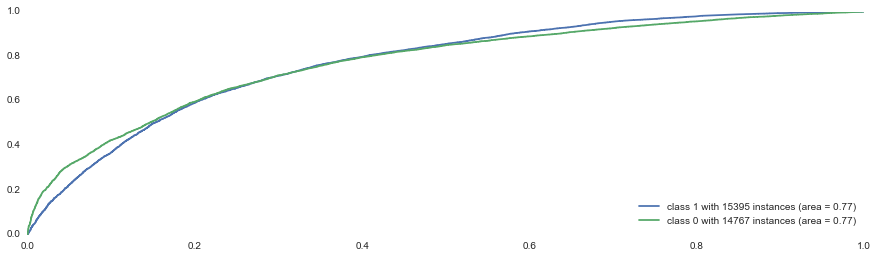

In [198]:
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhat_score = np.zeros((y.shape[0],2))

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])
    yhat_score[test] = clf1.predict_proba(X[test])


# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])
    
plt.figure(figsize=(15,4))
for i in np.random.permutation(2)[0:2]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")    
plt.show()

The ROC curve is really cool because it allows you to see the quality of your model to classify each class, while also showing the relationship between true positives and false positives.  Ideally, the area under our curve would be 1.  That would mean that as we increase the true positives we find, the false positives we find don't increase.  Our curves' steep initial ascent shows that we can increase the number of true positives a lot faster than the number of false positives.  The area under our curve is .77 which isn't too bad compared to 1.   

##Comparison Of Two Best Models

In [130]:
from sklearn.cross_validation import cross_val_score
# is clf1 better or worse than clf2?
cv=StratifiedKFold(y,n_folds=10)
acc1 = cross_val_score(clf1, X, y=y, cv=cv)
acc2 = cross_val_score(clf2, X, y=y, cv=cv)

In [131]:
t = 2.26 / np.sqrt(10)

e = (1-acc1)-(1-acc2)
# std1 = np.std(acc1)
# std2 = np.std(acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print 'Range of:', dbar-t*stdtot,dbar+t*stdtot 
print np.mean(acc1), np.mean(acc2)


Range of: -0.0594704479367 -0.0453649565619
0.75857088956 0.706153187311


Our t-test allows us to use a confidence level to determine whether or not we would reject our null hypothesis based on the number of degrees of freedom.  Our degrees of freedom is 10, and the confidence level we want is 95%.  Since the t-test interval does not include 0, we can not reject our null hypothesis that these 2 models are different.  From our histogram of Is_Married you can see that both classes appear around the same amount of times.  Therefore, neither the recall nor the precision could be used alone.  Instead we will use the f-measure, which functions as a sort of combination of the 2 as our metric.  The f-score isn't great for our 2 best models, but it isn't horrible either.  The accuracy is good however with around 80%.

###Task 2 -- Has College Degree Classifier

In [193]:
# create variables we are more familiar with
y = df_task2.Has_College_Degree.values
del df_task2["Has_College_Degree"]
X = df_task2.values

scl_obj = StandardScaler()
scl_obj.fit(X) # find points that make this zero mean and unit std
X = scl_obj.transform(X) # apply to data

yhat = np.zeros(y.shape) # we will fill this with predictions
best_n = np.zeros(y.shape)
# create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)


##K-Nearest Neighbor

In [55]:
# setup pipeline to take PCA, then fit a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import RandomizedPCA 
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

clf = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=20)),
     ('CLF_TJ_$$',KNeighborsClassifier(n_neighbors = 35))]
)
                  
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN, pipeline accuracy', total_accuracy

KNN, pipeline accuracy 0.75001657715


##Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

# setup pipeline to take PCA, then fit a RandomForest classifier
clf = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=55)),
     ('CLF_TJ_$$',RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, pipeline accuracy', total_accuracy


Random Forest, pipeline accuracy 0.757409986075


In [57]:
#Try best combination of parameters from grid search results
clf = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=True)

print clf
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, single accuracy', total_accuracy

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=120, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0)
Random Forest, single accuracy 0.763377760095


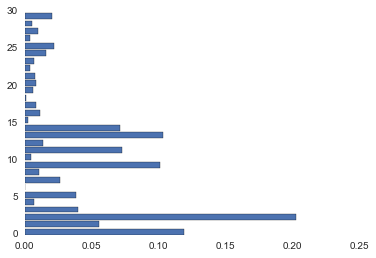

Generalization score estimate from training data 0.764062327329


In [58]:
# now lets get access to the different properties of our RF

plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

print 'Generalization score estimate from training data', clf.oob_score_

##Ada Boost (Decision Tree)

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump,n_estimators=20))]
)
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
  
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline accuracy 0.77935813275


##Nearest Centroid

In [60]:
from sklearn.neighbors import NearestCentroid

clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',NearestCentroid())]
)
param_grid = {"PCA_TJ_$$__n_components" : [5,25,75],"CLF_TJ_$$__metric":['cosine','euclidean']}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric

In [113]:
#Try best combination of parameters from grid search results
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=25)),
     ('CLF_TJ_$$',NearestCentroid(metric='euclidean'))]
)

for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Nearest Centroid Classifier, Refined pipeline accuracy', total_accuracy

Nearest Centroid Classifier, Refined pipeline accuracy 0.750381274451


##Gaussian Naive-Bayes

In [63]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',GaussianNB())]
)

param_grid = {"PCA_TJ_$$__n_components" : [5,50,100]}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n

total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', Rand

In [115]:
#Try best combination of parameters from grid search results
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
     ('CLF_TJ_$$',GaussianNB())]
)

for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Gaussian Naive-Bayes Classifier, Refined pipeline accuracy', total_accuracy

Gaussian Naive-Bayes Classifier, Refined pipeline accuracy 0.792984550096


Gaussian Naive-Bayes and Ada Boost were the two best classifiers for task 2 regarding whether or not someone has a college degree.  If you refer back to our histograms you can see that people with college degrees occur half as much as people without college degrees.  As a result of this substantially lower frequency we will look at recall and accuracy specifically for our 2 best classifiers

In [194]:
clf1 = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
     ('CLF_TJ_$$',GaussianNB())]
)

for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Total Precision: 0.535128205128
Total Recall: 0.210744218924
Total F score: 0.302398029414
Total Accuracy: 0.680757244215


In [195]:
dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf2 = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump,n_estimators=20))]
)
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf2.fit(X[train],y[train])
    yhat[test] = clf2.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Total Precision: 0.562669816893
Total Recall: 0.480965364031
Total F score: 0.518619337979
Total Accuracy: 0.706849678403


##Roc Curves

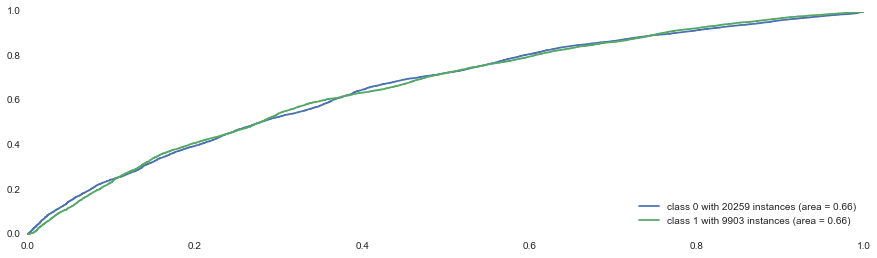

In [196]:
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhat_score = np.zeros((y.shape[0],2))

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])
    yhat_score[test] = clf1.predict_proba(X[test])


# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])
    
plt.figure(figsize=(15,4))
for i in np.random.permutation(2)[0:2]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")    
plt.show()

    From our ROC curve you can see that the area under our curvesis low (.66) which is bad beacuse ideally it would be 1.  Also, the curve showing the relationship between false positives and true positivss is not steep enough which means that as our true positives increase, our false positives also increase (at a slighlty lower rate).

##Comparison of Two Best Models

In [135]:
from sklearn.cross_validation import cross_val_score
# is clf1 better or worse than clf2?
cv=StratifiedKFold(y,n_folds=10)
acc1 = cross_val_score(clf1, X, y=y, cv=cv)
acc2 = cross_val_score(clf2, X, y=y, cv=cv)

In [136]:
t = 2.26 / np.sqrt(10)

e = (1-acc1)-(1-acc2)
# std1 = np.std(acc1)
# std2 = np.std(acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print 'Range of:', dbar-t*stdtot,dbar+t*stdtot 
print np.mean(acc1), np.mean(acc2)


Range of: 0.0134462594452 0.0287918015015
0.680956832193 0.702075862667


If you look at our t-test score for task 2 you can see that 0 is not included in the interval, so we can not say with 95% confidence that they are different.  From our histogram of Has_College_Degree we can see that our frequency is low compared to our other class so that means we will use accuracy and recall as our metrics.  You can see that the accuracy for our 2 best models is decent (around 70%), but our recall is very poor for both.

###Task 3 -- Is Employed Classifier

In [188]:
# create variables we are more familiar with
y = df_task3.Is_Employed.values
del df_task3["Is_Employed"]
X = df_task3.values

scl_obj = StandardScaler()
scl_obj.fit(X) # find points that make this zero mean and unit std
X = scl_obj.transform(X) # apply to data

yhat = np.zeros(y.shape) # we will fill this with predictions
best_n = np.zeros(y.shape)
# create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)


##K-Nearest Neighbor

In [70]:
# setup pipeline to take PCA, then fit a KNN classifier
clf = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=20)),
     ('CLF_TJ_$$',KNeighborsClassifier(n_neighbors = 35))]
)
                  
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN, pipeline accuracy', total_accuracy

KNN, pipeline accuracy 0.999535839798


##Random Forest

In [71]:
#Try best combination of parameters from grid search results
clf = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=55)),
     ('CLF_TJ_$$',RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=False))]
)

print clf
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, Refined pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=55, random_state=None,
       whiten=False)), ('CLF_TJ_$$', RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=120, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0))])
Random Forest, Refined pipeline accuracy 0.999436376898


In [72]:
#Try best combination of parameters from grid search results
clf = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=True)

print clf
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, Refined pipeline accuracy', total_accuracy

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=120, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0)
Random Forest, Refined pipeline accuracy 0.999535839798


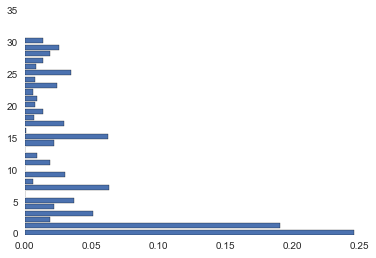

Generalization score estimate from training data 0.999521125723


In [73]:
# now lets get access to the different properties of our RF

plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

print 'Generalization score estimate from training data', clf.oob_score_

##Ada Boost (Decision Tree)

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf_pipe = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump,n_estimators=20))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
  
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline accuracy 0.999535839798


##Nearest Centroid

In [75]:
from sklearn.neighbors import NearestCentroid

clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',NearestCentroid())]
)
param_grid = {"PCA_TJ_$$__n_components" : [5,25,75],"CLF_TJ_$$__metric":['cosine','euclidean']}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric

In [77]:
#Try best combination of parameters from grid search results
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=25)),
     ('CLF_TJ_$$',NearestCentroid(metric='euclidean'))]
)

print clf
for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Nearest Centroid Classifier, Refined pipeline accuracy', total_accuracy

GridSearchCV(cv=None,
       estimator=Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'PCA_TJ_$$__n_components': [5, 25, 75], 'CLF_TJ_$$__metric': ['cosine', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
Nearest Centroid Classifier, Refined pipeline accuracy 0.912472647702


##Gaussian Naive-Bayes

In [78]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',GaussianNB())]
)

param_grid = {"PCA_TJ_$$__n_components" : [5,50,100]}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n

total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', Rand

In [80]:
#Try best combination of parameters from grid search results
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
     ('CLF_TJ_$$',GaussianNB())]
)

print clf
for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Gaussian Naive-Bayes Classifier, Refined pipeline accuracy', total_accuracy

GridSearchCV(cv=None,
       estimator=Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('CLF_TJ_$$', GaussianNB())]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'PCA_TJ_$$__n_components': [5, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
Gaussian Naive-Bayes Classifier, Refined pipeline accuracy 0.999535839798


For this example we found four different models all with equal very high accuracy, so I chose the first two models to compare.  Because the Is_Employed class has a very high frequency we will use the precision and accuracy as our two measures of 

In [189]:
clf1 = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=20)),
     ('CLF_TJ_$$',KNeighborsClassifier(n_neighbors = 35))]
)
                  
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Total Precision: 0.999535839798
Total Recall: 1.0
Total F score: 0.999767866026
Total Accuracy: 0.999535839798


In [190]:
clf2 = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=55)),
     ('CLF_TJ_$$',RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=False))]
)

print clf
for train, test in cv:
    clf2.fit(X[train],y[train])
    yhat[test] = clf2.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=10, max_fe...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=20, random_state=None))])
Total Precision: 0.999535793627
Total Recall: 0.999900490912
Total F score: 0.999718109009
Total Accuracy: 0.999436376898


##Roc Curves

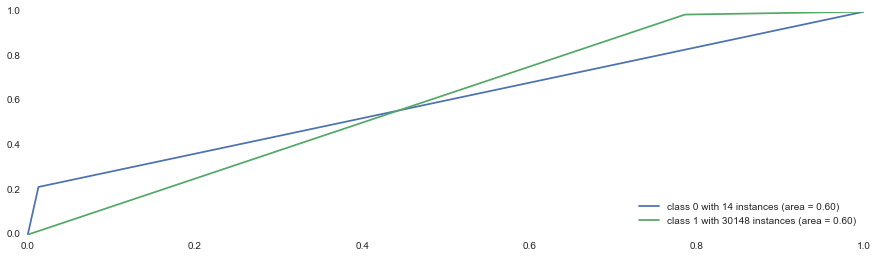

In [192]:
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhat_score = np.zeros((y.shape[0],2))

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])
    yhat_score[test] = clf1.predict_proba(X[test])


# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])
    
plt.figure(figsize=(15,4))
for i in np.random.permutation(2)[0:2]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")    
plt.show()

  If you look at our roc curve you can see the area is very low, which isn't a great result.  This means that as we decrease the number of false positives, the number of true positives also decreases greatly.

##Comparison of 2 best Models

In [140]:
from sklearn.cross_validation import cross_val_score
# is clf1 better or worse than clf2?
cv=StratifiedKFold(y,n_folds=10)
acc1 = cross_val_score(clf1, X, y=y, cv=cv)
acc2 = cross_val_score(clf2, X, y=y, cv=cv)

In [141]:
t = 2.26 / np.sqrt(10)

e = (1-acc1)-(1-acc2)
# std1 = np.std(acc1)
# std2 = np.std(acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print 'Range of:', dbar-t*stdtot,dbar+t*stdtot 
print np.mean(acc1), np.mean(acc2)


Range of: -0.00025111538685 5.22423341491e-05
0.999535874943 0.999436438417


When we look at the T-test we see that the interval does include 0, so we can not reject the null hypotheses with 95% confidence.  They could be the same.  If you look back to our metrics of the 2 models you can see that both models have a very high precision and accuracy.  This isn't very surprising since there are probably only a few records out of 30,000 where they were unemployed.

###Task 4 -- Income Is Greather than 50k a year Classifier

In [142]:
# create variables we are more familiar with
y = df_task4.Is_Grtr_50.values
del df_task4["Is_Grtr_50"]
X = df_task4.values

scl_obj = StandardScaler()
scl_obj.fit(X) # find points that make this zero mean and unit std
X = scl_obj.transform(X) # apply to data

yhat = np.zeros(y.shape) # we will fill this with predictions
best_n = np.zeros(y.shape)
# create cross validation iterator
cv = StratifiedKFold(y, n_folds=10)


##K-Nearest Neighbor

In [85]:
#Now run ideal kNN parameter combo from all folds -- I used majority rule to determine which to use when comparing
#over the folds -> For the nearest neighbor, both 15 and 35 were chosen ideal half the time so I took an average of
#the 2 (25)
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=40)),
     ('CLF_TJ_$$',KNeighborsClassifier(n_neighbors=25))]
)
for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'KNN, Refined accuracy', total_accuracy

KNN, Refined accuracy 0.812412969962


##Random Forest

In [86]:
#Try best combination of parameters from grid search results
clf = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=55)),
     ('CLF_TJ_$$',RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=False))]
)

print clf
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, Refined pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=55, random_state=None,
       whiten=False)), ('CLF_TJ_$$', RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=120, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0))])
Random Forest, Refined pipeline accuracy 0.818148663882


In [87]:
# setup pipeline to take PCA, then fit a RandomForest classifier
clf = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print 'Random Forest, pipeline accuracy', total_accuracy

Random Forest, pipeline accuracy 0.819938996088


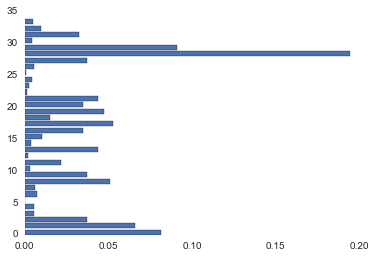

Generalization score estimate from training data 0.819685416436


In [88]:
# now lets get access to the different properties of our RF

plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

print 'Generalization score estimate from training data', clf.oob_score_

##AdaBoost (Decision Tree)

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf_pipe = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump,n_estimators=20))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
  
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline accuracy 0.820767853591


##Nearest Centroid

In [90]:
from sklearn.neighbors import NearestCentroid

clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',NearestCentroid())]
)
param_grid = {"PCA_TJ_$$__n_components" : [5,25,75],"CLF_TJ_$$__metric":['cosine','euclidean']}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=75, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=75, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=25, random_state=None,
       whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric

In [92]:
#Try best combination of parameters from grid search results
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=25)),
     ('CLF_TJ_$$',NearestCentroid(metric='euclidean'))]
)

print clf
for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Nearest Centroid Classifier, Refined pipeline accuracy', total_accuracy

GridSearchCV(cv=None,
       estimator=Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('CLF_TJ_$$', NearestCentroid(metric='euclidean', shrink_threshold=None))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'PCA_TJ_$$__n_components': [5, 25, 75], 'CLF_TJ_$$__metric': ['cosine', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
Nearest Centroid Classifier, Refined pipeline accuracy 0.750381274451


##Gaussian Naive-Bayes

In [93]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA()),
     ('CLF_TJ_$$',GaussianNB())]
)

param_grid = {"PCA_TJ_$$__n_components" : [5,50,100]}      

clf = GridSearchCV(clf_pipe, param_grid,scoring='accuracy')

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    best_n = clf.best_estimator_
    print best_n

total_accuracy = mt.accuracy_score(y, yhat)
print 'Pipeline accuracy', total_accuracy

Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=False)), ('CLF_TJ_$$', GaussianNB())])
Pipeline(steps=[('PCA_TJ_$$', Rand

In [95]:
#Try best combination of parameters from grid search results
clf_pipe = Pipeline(
    [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
     ('CLF_TJ_$$',GaussianNB())]
)

print clf
for train, test in cv:
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print 'Gaussian Naive-Bayes Classifier, Refined pipeline accuracy', total_accuracy

GridSearchCV(cv=None,
       estimator=Pipeline(steps=[('PCA_TJ_$$', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('CLF_TJ_$$', GaussianNB())]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'PCA_TJ_$$__n_components': [5, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
Gaussian Naive-Bayes Classifier, Refined pipeline accuracy 0.793117167297


Random Forest and Ada Boost were the 2 models with the highest accuracy so we will use them for our task.  The Is_Grtr_50 class has a low frequency, so we will use Recall and Accuracy for our analysis.

In [143]:
clf1 = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=120,oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf1.fit(X[train],y[train])
    yhat[test] = clf1.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Total Precision: 0.697962292897
Total Recall: 0.488145977624
Total F score: 0.57449643389
Total Accuracy: 0.820005304688


In [162]:
dt_stump = DecisionTreeClassifier(max_depth=10, compute_importances=None, criterion='gini',
              max_features=None, min_density=None,
             min_samples_leaf=1, min_samples_split=2, random_state=None,
             splitter='best')

clf2 = Pipeline(
     [('PCA_TJ_$$',RandomizedPCA(n_components=5)),
      ('CLF_TJ_$$',AdaBoostClassifier(base_estimator=dt_stump,n_estimators=20))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf2.fit(X[train],y[train])
    yhat[test] = clf2.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = mt.precision_score(y,yhat)
total_recall = mt.recall_score(y,yhat)
total_f = mt.f1_score(y,yhat)

print 'Total Precision:',total_precision
print 'Total Recall:',total_recall
print 'Total F score:',total_f
print 'Total Accuracy:',total_accuracy

Total Precision: 0.564209896846
Total Recall: 0.502663825253
Total F score: 0.531661618652
Total Accuracy: 0.77955705855


##Roc Plots

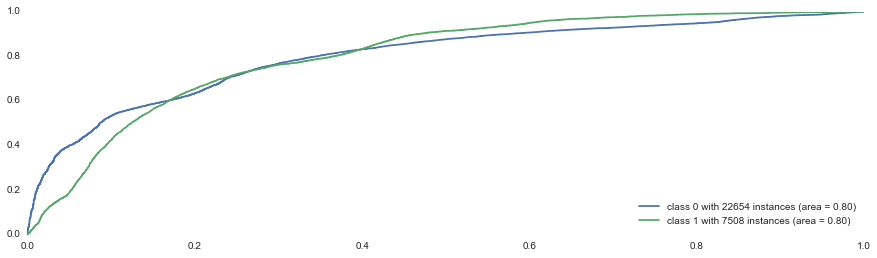

In [179]:
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhat_score = np.zeros((y.shape[0],2))

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv:
    clf2.fit(X[train],y[train])
    yhat[test] = clf2.predict(X[test])
    yhat_score[test] = clf2.predict_proba(X[test])


# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])
    
plt.figure(figsize=(15,4))
for i in np.random.permutation(2)[0:2]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")    
plt.show()

     The fact that our curve has a steep initial ascent means that as we increase our true positive rate our false positive rate doesn't also increase.  We can also look at the area of the curve.  The closer to 1 the better.  Fortunately the curve for both of our classes have high areas.

##Comparison of 2 Best Models

In [145]:
from sklearn.cross_validation import cross_val_score
# is clf1 better or worse than clf2?
cv=StratifiedKFold(y,n_folds=10)
acc1 = cross_val_score(clf1, X, y=y, cv=cv)
acc2 = cross_val_score(clf2, X, y=y, cv=cv)

In [146]:
t = 2.26 / np.sqrt(10)

e = (1-acc1)-(1-acc2)
# std1 = np.std(acc1)
# std2 = np.std(acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print 'Range of:', dbar-t*stdtot,dbar+t*stdtot 
print np.mean(acc1), np.mean(acc2)

Range of: -0.045760050061 -0.0360651810084
0.820801502467 0.779888886932


Since the range doesn't include zero we can say with 95% confidence that they are different if you look at the t score.  If you look at the metrics we used, the recall is better with the Decision Tree, but the Accuracy is better with the random forest.  Both accuracies are approximately 80% however.

##Deployment

    Our tasks can transfer over to the real world farely easily in regards to marketing.  First, classifying whether or not someone is married can be very useful when trying to target more of a single demographic.  For example, a dating app might put a lot of stock in a classification model that could accurately tell them what people are single (based on our features).
    The second task was Has_College_Degree.  This also has a few different applications.  An employer might only want to target employees who have a degree.  This could really help them narrow down the workforce they want to search for.  An expensive retail brand might also want to target people with a college degree thinking that they are more likely to wear professional clothing in their career.
    Determining whether or not someone is employed could be useful for marketing in general, because odds are someone who is unemployed will have less money to buy things with.
    Lastly was the classification task that the original data was designed for which was determining if someone makes more than $50k a year.  Our model would be really useful for this because it is accurate, and could be used anytime you want to target a more affluent demographic.  